You now have a pretty varied suite of clustering and clustering evaluation methods; we'd be remiss if we didn't give you the opportunity to try them out on some real data. So here we go!

There is a lot of information on runners and their performance for the Boston Marathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook and submit it below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv("results.csv")

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.1
2,16.62,"Van Dyk, Ernst F.",1,45.8,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.1,RSA,Paarl,76.1
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.2,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.6,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.describe(include='all')

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
count,31984,31984,31984.000000,31984,31984,31984.000000,31984.000000,31984,31984.000000,1244,...,31984.000000,31984.000000,29408,31984,31984,31984,31984,31984,31983,31984
unique,2766,31915,NaN,6570,2,NaN,NaN,31984,NaN,84,...,NaN,NaN,68,8090,1491,5651,5375,78,5934,10546
top,-,"Murphy, John E.",NaN,-,M,NaN,NaN,12599,NaN,GBR,...,NaN,NaN,MA,-,23.93,-,-,USA,Boston,-
freq,50,2,NaN,216,17617,NaN,NaN,1,NaN,171,...,NaN,NaN,7587,40,81,72,51,27233,1034,39
mean,NaN,NaN,1932.563032,NaN,NaN,42.407079,242.997314,NaN,8051.044741,NaN,...,15939.587825,9.275658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1715.228694,NaN,NaN,11.316496,52.300431,NaN,4754.005626,NaN,...,9232.978224,1.992486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,18.000000,80.600000,NaN,1.000000,NaN,...,1.000000,3.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,610.000000,NaN,NaN,33.000000,205.527500,NaN,3972.000000,NaN,...,7943.750000,7.850000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1425.000000,NaN,NaN,42.000000,232.370000,NaN,7970.000000,NaN,...,15939.500000,8.870000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2611.000000,NaN,NaN,50.000000,273.235000,NaN,11968.000000,NaN,...,23935.250000,10.430000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Drop the columns name and bib due to no of unique values and ctz due to most null values
bm2014 = df.drop(['name', 'gender','bib','ctz', 'state','country','city'], axis=1)

In [6]:
bm2014.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
0,17.37,8,47.67,47,85.25,8,71.4,8,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,1,82.43,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.1
2,16.62,1,45.8,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.1,76.1
3,32.57,3,82.43,24,140.58,3,116.37,27,5.37,99.33,16.2,69.47,65.83,132.95
4,17.12,2,46.37,40,81.23,2,67.83,2,3.10,57.03,8.02,38.6,36.58,76.72


In [7]:
bm2014.dtypes

10k           object
division       int64
25k           object
age            int64
official     float64
genderdiv      int64
35k           object
overall        int64
pace         float64
30k           object
5k            object
half          object
20k           object
40k           object
dtype: object

In [8]:
runs = ['5k', '10k', 'half', '20k', '25k', '30k', '35k', '40k']

for run in runs:
    bm2014[run] = pd.to_numeric(bm2014[run], errors='coerce')
    bm2014[run] = bm2014[run].map(lambda x:bm2014[run].mean() if x is '-' else float(x))

In [9]:
bm2014.dtypes

10k          float64
division       int64
25k          float64
age            int64
official     float64
genderdiv      int64
35k          float64
overall        int64
pace         float64
30k          float64
5k           float64
half         float64
20k          float64
40k          float64
dtype: object

In [10]:
bm2014.describe(include='all')

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31934.000000,31984.000000,31768.000000,31984.000000,31984.000000,31984.000000,31950.000000,31984.000000,31984.000000,31944.000000,31932.000000,31912.000000,31933.000000,31945.000000
mean,51.799275,1932.563032,133.612055,42.407079,242.997314,8051.044741,196.857605,15939.587825,9.275658,164.571219,25.755559,111.664566,105.711669,229.001490
std,8.965513,1715.228694,25.596958,11.316496,52.300431,4754.005626,41.979107,9232.978224,1.992486,33.953683,4.327830,21.061188,19.780525,49.159902
min,16.620000,1.000000,45.800000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000
25%,45.400000,610.000000,115.470000,33.000000,205.527500,3972.000000,167.122500,7943.750000,7.850000,140.670000,22.650000,96.845000,91.750000,193.820000
50%,50.330000,1425.000000,128.875000,42.000000,232.370000,7970.000000,188.170000,15939.500000,8.870000,157.730000,25.080000,107.830000,102.150000,218.850000
75%,57.170000,2611.000000,147.735000,50.000000,273.235000,11968.000000,220.170000,23935.250000,10.430000,182.880000,28.470000,123.070000,116.520000,257.450000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


In [11]:
X = bm2014

# Normalize
X_norm = normalize(X.dropna(axis=0, how='any'))

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)

X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

print(len(X1), len(X_pca1))
print(len(X2), len(X_pca2))
print(len(X3), len(X_pca3))
print(len(X4), len(X_pca4))


7912 7912
7912 7912
7912 7912
7913 7913


In [12]:
# Ensuring all sets are the same length
X4 = X4[:7912][:]

X_pca4 = X_pca4[:7912][:]

print(len(X1), len(X_pca1))
print(len(X2), len(X_pca2))
print(len(X3), len(X_pca3))
print(len(X4), len(X_pca4))

7912 7912
7912 7912
7912 7912
7912 7912


## K-Means Clustering:

In [13]:
score = pd.DataFrame(columns=['cluster_pred','silhouette_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 5):
       
        # Instantiating and fit_predicting model to then add to data frame
        kmeans = KMeans(n_clusters=nclust, random_state=42)
        pred = kmeans.fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
        
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = kmeans.labels_
        sscore = metrics.silhouette_score(data[0], labels, metric='euclidean')
        score = score.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore}, ignore_index=True)

In [14]:
score.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,silhouette_score
11,clust4_sample3,0.498514
8,clust4_sample2,0.495041
2,clust4_sample0,0.494339
5,clust4_sample1,0.492634
10,clust3_sample3,0.481397
1,clust3_sample0,0.480159
7,clust3_sample2,0.478402
4,clust3_sample1,0.471739
3,clust2_sample1,0.461813
6,clust2_sample2,0.452349


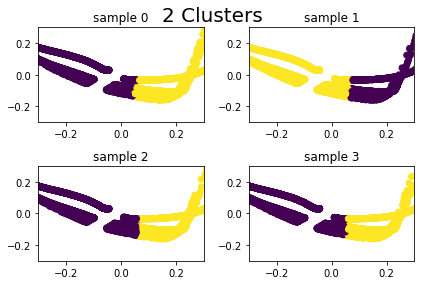

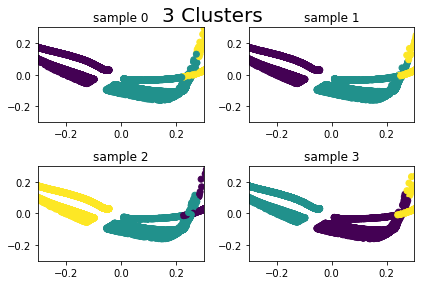

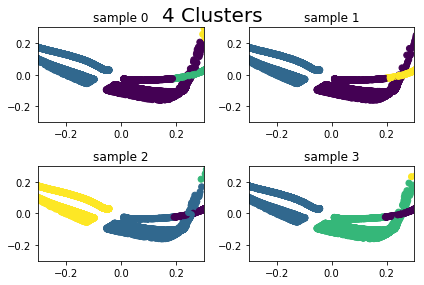

In [15]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

## Mean Shift clustering:

In [16]:
# Initialize new data frames
ypred_ms = pd.DataFrame()
score_ms = pd.DataFrame(columns=['cluster_pred','silhouette_score', 'quantile'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    
    # Creating a list of possible quantiles to test in mean shift.
    for n in [0.3, 0.4, 0.5, 0.6]:
        
        # Estimating number of clusters for data
        bandwidth = estimate_bandwidth(data, quantile=n, n_samples=500)
        
        # Ensuring all sets are the same lenght
        data = data[:7912][:]
        
        # Instantiating and fit_predicting model to then add to data frame
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        pred = ms.fit_predict(data)
        labels = ms.labels_
        cntrs = len(np.unique(labels))
        ypred_ms['clust' + str(cntrs) + '_sample' + str(counter)] = pred
        
        # Calculating silhouette scores for the data and adding that to the shilouette score
        sscore = metrics.silhouette_score(data, labels, metric='euclidean')
        score_ms = score_ms.append({'cluster_pred':'clust' + str(cntrs) + '_sample' + str(counter), 
                              'silhouette_score':sscore, 'quantile':n}, ignore_index=True)

In [17]:
score_ms.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,silhouette_score,quantile
3,clust2_sample0,0.741874,0.6
15,clust2_sample3,0.738013,0.6
7,clust3_sample1,0.666534,0.6
11,clust4_sample2,0.634089,0.6
12,clust3_sample3,0.533959,0.3
4,clust4_sample1,0.513486,0.3
13,clust5_sample3,0.511181,0.4
14,clust4_sample3,0.508507,0.5
6,clust3_sample1,0.505248,0.5
9,clust6_sample2,0.505241,0.4


## Spectral Clustering:

In [18]:
# Initialize data frames
ypred_sc = pd.DataFrame()
score_sc = pd.DataFrame(columns=['cluster_pred','silhouette_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred_sc['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred_sc['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 5):
        
        # Instantiating and fit_predicting model to then add to data frame
        sc = SpectralClustering(n_clusters=nclust)
        pred = sc.fit_predict(data[0])
        ypred_sc['clust' + str(nclust) + '_sample' + str(counter)] = pred
        
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = sc.labels_
        sscore_sc = metrics.silhouette_score(data[0], labels, metric='euclidean')
        score_sc = score_sc.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore_sc}, ignore_index=True)

In [19]:
score_sc.sort_values(by='silhouette_score', ascending=False)

,cluster_pred,silhouette_score
11,clust4_sample3,0.492979
2,clust4_sample0,0.488743
8,clust4_sample2,0.488683
5,clust4_sample1,0.486450
3,clust2_sample1,0.474149
0,clust2_sample0,0.456296
6,clust2_sample2,0.455826
9,clust2_sample3,0.450917
4,clust3_sample1,0.448374
10,clust3_sample3,0.426068


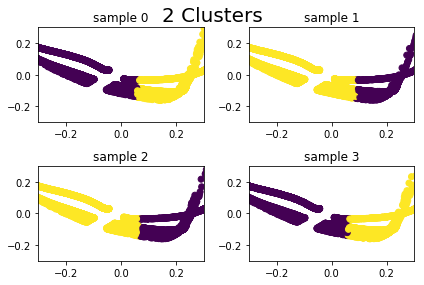

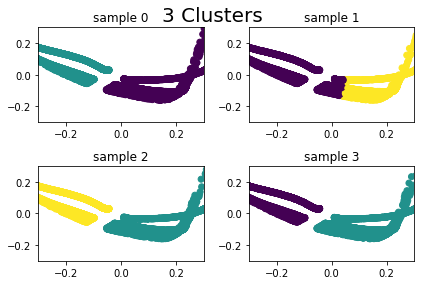

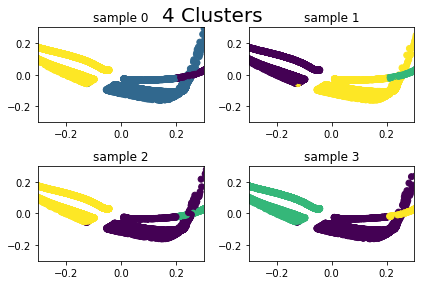

In [20]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred_sc['pca_f1_sample{}'.format(i)]
        y_sub = ypred_sc['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred_sc['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [21]:
# Initialize data frames
ypred = pd.DataFrame()
score_af = pd.DataFrame(columns=['cluster_pred','SScore'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    
    # Ensuring all sets are the same length
    data = data[:7912][:]
    
    # Instantiating and fit_predicting model to then add to data frame
    af = AffinityPropagation().fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    
    # Calculating silhouette scores for the data and adding that to the silhouette score
    labels = af.labels_
    sscore_af = metrics.silhouette_score(data, labels, metric='euclidean')
    score_af = score_af.append({'cluster_pred':'clust' + str(n_clusters_) + '_sample' + str(counter), 
                              'SScore':sscore_af}, ignore_index=True)

In [22]:
score_af.sort_values(by='SScore', ascending=False)

,cluster_pred,SScore
0,clust3993_sample0,0.154249
3,clust4633_sample3,0.153457
1,clust5904_sample1,0.105183
2,clust6229_sample2,0.066025


## Conclusion

The observed highest score was meanshift with 2 clusters and 0.6 qusntile. But overall the highest scores where for 4 clusters and the best method for optimal score was Mean shift method.